/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3-3507564052.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


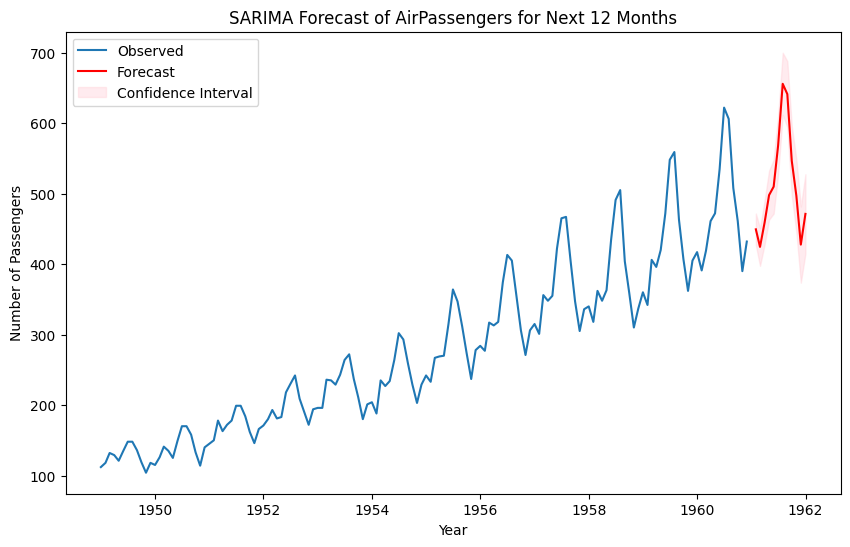

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the AirPassengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Fit SARIMA model (p,d,q)(P,D,Q,s)
model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast the next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the historical data and forecast
plt.figure(figsize=(10,6))
plt.plot(data['Passengers'], label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast of AirPassengers for Next 12 Months')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
